In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import cvxopt

In [2]:
# Create simple dataset
X = np.array([[1,4],[-3,3],[-2.5,5],[0,1],[2,0.5],[1,2]]) # 2D features
y = np.ones((len(X),1)) # label binary -1,1
y[3:,] = -1 # set nagative label
print(X.shape)
print(y.shape)
y

(6, 2)
(6, 1)


array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.]])

Text(0.5, 1.0, 'visualize dataset')

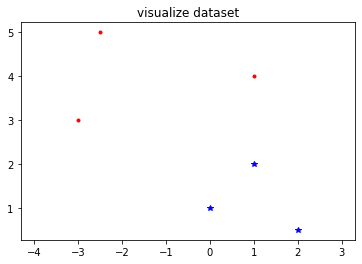

In [3]:
# Visualize your dataset
plt.axis('equal')
plt.plot(X[:3,0],X[:3,1],'r.',
        X[3:,0],X[3:,1],'b*'
        )
plt.title("visualize dataset")

## Quadratic programming for solving SVM CVXOPT (Convex optimazation)
Solve a quaratic programming
```
Minimize: (1/2)*x'*P*x + q'*x
Subject to: G*x <= h (each y*a is zero)
            A*x  = b

With:
x : alpha vector [m x 1] (m is samples number)
x': alpha vector transpose [1 x m]
H : matrix by elementwise multiply of labels features (yX) [m x m]
P : quaratic coefficients matrix [m x m]
q : -1 (matrix) [m x 1]
G : eye matrix negative [m x m]
h : 0 (matrix) [m,] = [m x 1]
A : labels matrix transpose [1 x m]
b : 0 [1x1]
```
![quaratic_programming](./quaratic_problem.png)

In [4]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [5]:
m,n = X.shape
print(f"samples: {m}")
print(f"dimensions: {n}")
print(f"y.shape: {y.shape}")
print(f"X.shape: {X.shape}")

samples: 6
dimensions: 2
y.shape: (6, 1)
X.shape: (6, 2)


In [6]:
X

array([[ 1. ,  4. ],
       [-3. ,  3. ],
       [-2.5,  5. ],
       [ 0. ,  1. ],
       [ 2. ,  0.5],
       [ 1. ,  2. ]])

In [7]:
y

array([[ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.]])

In [8]:
X_dash = y * X # elementwise multiply
print(f"X_dash.shape: {X_dash.shape}")
X_dash

X_dash.shape: (6, 2)


array([[ 1. ,  4. ],
       [-3. ,  3. ],
       [-2.5,  5. ],
       [-0. , -1. ],
       [-2. , -0.5],
       [-1. , -2. ]])

In [9]:
H =  X_dash @ X_dash.T # np.dot(X_dash,X_dash.T)
print(f"H: {H.shape}")
H

H: (6, 6)


array([[17.  ,  9.  , 17.5 , -4.  , -4.  , -9.  ],
       [ 9.  , 18.  , 22.5 , -3.  ,  4.5 , -3.  ],
       [17.5 , 22.5 , 31.25, -5.  ,  2.5 , -7.5 ],
       [-4.  , -3.  , -5.  ,  1.  ,  0.5 ,  2.  ],
       [-4.  ,  4.5 ,  2.5 ,  0.5 ,  4.25,  3.  ],
       [-9.  , -3.  , -7.5 ,  2.  ,  3.  ,  5.  ]])

In [10]:
P = cvxopt_matrix(H) # coefficient matrix
print(f"P: {P.size}")
P

P: (6, 6)


<6x6 matrix, tc='d'>

In [11]:
q = -1 * np.ones((m,1))
print(f"q.shape: {q.shape}")
print(q)
q = cvxopt_matrix(q)
q

q.shape: (6, 1)
[[-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]]


<6x1 matrix, tc='d'>

In [12]:
G = -np.eye(m)
print(f"G.shape: {G.shape}")
print(G)
G = cvxopt_matrix(G)
G

G.shape: (6, 6)
[[-1. -0. -0. -0. -0. -0.]
 [-0. -1. -0. -0. -0. -0.]
 [-0. -0. -1. -0. -0. -0.]
 [-0. -0. -0. -1. -0. -0.]
 [-0. -0. -0. -0. -1. -0.]
 [-0. -0. -0. -0. -0. -1.]]


<6x6 matrix, tc='d'>

In [13]:
h = np.zeros(m)
print(f"h.shape: {h.shape}")
print(h)
h = cvxopt_matrix(h)
h

h.shape: (6,)
[0. 0. 0. 0. 0. 0.]


<6x1 matrix, tc='d'>

In [14]:
A = y.T
print(f"A.shape: {A.shape}")
print(A)
A = cvxopt_matrix(A)
A

A.shape: (1, 6)
[[ 1.  1.  1. -1. -1. -1.]]


<1x6 matrix, tc='d'>

In [15]:
b = cvxopt_matrix(0.0)
b

<1x1 matrix, tc='d'>

In [16]:
# Setting solver parameters (change default to descrease tolerance)
cvxopt_solvers.options['show_progress'] = True # show progress
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

# Run solver
sol = cvxopt_solvers.qp(P,q,G,h,A,b)
alphas = np.array(sol['x'])
alphas

     pcost       dcost       gap    pres   dres
 0: -1.1881e+00 -2.1506e+00  1e+01  3e+00  2e+00
 1: -6.3445e-01 -1.1945e+00  2e+00  4e-01  2e-01
 2: -4.5745e-01 -6.7458e-01  2e-01  1e-16  1e-15
 3: -5.2665e-01 -5.3295e-01  6e-03  2e-16  9e-16
 4: -5.3120e-01 -5.3127e-01  6e-05  1e-16  4e-16
 5: -5.3125e-01 -5.3125e-01  6e-07  3e-16  6e-16
 6: -5.3125e-01 -5.3125e-01  6e-09  1e-16  1e-15
 7: -5.3125e-01 -5.3125e-01  6e-11  1e-16  1e-15
Optimal solution found.


array([[4.68750000e-01],
       [6.25000000e-02],
       [1.97861647e-11],
       [1.79322288e-12],
       [4.32814763e-12],
       [5.31250000e-01]])

## Find w,b

![find_wb](./find_wb.png)

In [17]:
w = np.zeros((2,)) # w = (w1,w2) w_i = sum(y_i * x_i * )
for i in range(m):
    w += alphas[i]*y[i]*X[i]
print(w)

[-0.25  1.  ]


In [18]:
# Compute w,b
epsilon = 1e-4 # Accept rate of alpha_i
S = (alphas > epsilon).flatten()
# S is the set of Lagranges multipliers alpha_i which are associated with support vectors
w = np.sum(alphas[S] * y[S] * X[S],axis = 0,keepdims = True).T
print(f"w.shape: {w.shape}")
print(w)

w.shape: (2, 1)
[[-0.25]
 [ 1.  ]]


In [19]:
# Find bias
bias = np.mean(y[S] - X[S] @ w)
bias

-2.7499999997414157

In [20]:
print('w: ',w)
print('bias: ',bias)

w:  [[-0.25]
 [ 1.  ]]
bias:  -2.7499999997414157


Text(0.5, 1.0, 'visualize dataset')

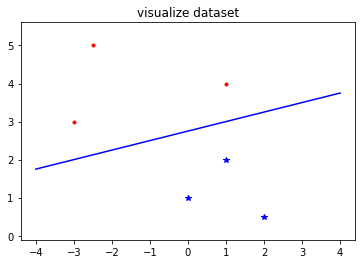

In [21]:
# Draw plot
x1 = np.linspace(-4,4)
x2 =  (-bias - w[0,0] * x1)/w[1,0]# In the line y = wx +b = 0
# Visualize your dataset
plt.axis('equal')
plt.plot(X[:3,0],X[:3,1],'r.',
        X[3:,0],X[3:,1],'b*'
        )
plt.plot(x1,x2,'b-')
plt.title("visualize dataset")

## Non-linearly separable data

In [22]:
import sklearn.metrics.pairwise
dir(sklearn.metrics.pairwise)

['DataConversionWarning',
 'KERNEL_PARAMS',
 'PAIRED_DISTANCES',
 'PAIRWISE_BOOLEAN_FUNCTIONS',
 'PAIRWISE_DISTANCE_FUNCTIONS',
 'PAIRWISE_KERNEL_FUNCTIONS',
 'Parallel',
 '_NAN_METRICS',
 '_VALID_METRICS',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_argmin_min_reduce',
 '_check_chunk_size',
 '_chi2_kernel_fast',
 '_dist_wrapper',
 '_euclidean_distances',
 '_euclidean_distances_upcast',
 '_get_mask',
 '_num_samples',
 '_pairwise_callable',
 '_parallel_pairwise',
 '_precompute_metric_params',
 '_return_float_dtype',
 '_sparse_manhattan',
 'additive_chi2_kernel',
 'check_array',
 'check_non_negative',
 'check_paired_arrays',
 'check_pairwise_arrays',
 'chi2_kernel',
 'cosine_distances',
 'cosine_similarity',
 'csr_matrix',
 'delayed',
 'distance',
 'distance_metrics',
 'effective_n_jobs',
 'euclidean_distances',
 'gen_batches',
 'gen_even_slices',
 'get_chunk_n_rows',
 'haversine_distances',
 'is_scalar_nan',
 'issp

In [23]:
np.outer(y,y)

array([[ 1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1., -1., -1., -1.],
       [ 1.,  1.,  1., -1., -1., -1.],
       [-1., -1., -1.,  1.,  1.,  1.],
       [-1., -1., -1.,  1.,  1.,  1.],
       [-1., -1., -1.,  1.,  1.,  1.]])

In [24]:
np.diag(np.ones(6)*-1)

array([[-1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.]])

In [25]:
np.identity(6)

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [26]:
np.vstack((np.diag(np.ones(6)*-1),np.identity(6)))

array([[-1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.],
       [ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.]])

In [27]:
tmp1 = np.zeros(6)
tmp1

array([0., 0., 0., 0., 0., 0.])

In [28]:
tmp2 = np.ones(6) * 0.01
tmp2

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [29]:
np.hstack((tmp1,tmp2))

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01])

In [30]:
ind = np.arange(len(alphas)).reshape((-1,1))[(alphas > epsilon)]
ind

array([0, 1, 5])

In [31]:
# Create a subclass SVM model
class MySVM(object):
    def __init__(self,kernel = 'linear', C = None, gamma = 1, dergree = 3, coef0 = 1,epsilon = 1e-5):
        self.kernel = kernel # kernel types (linear,polynomial,rbf,gaussian)
        self.C = C # soft margin
        if self.C is not None:
            self.C  = float(self.C)
        self.gamma = gamma # for rbf_kernel of sklearn.metrics.pairwise
        self.dergree = 3 # for polynomial_kernel of sklearn.metrics.pairwise
        self.coef0 = 1 # for polynomial_kernel of sklearn.metrics.pairwise
        self.epsilon = epsilon # Alphas accepted rate
    def fit(self,X,y):
        '''
        Train the model to find w,b
        
        Arguments:
            X --- features, shape (n_samples,n_features)
            y --- binary labels, shape (n_samples,1)
        '''
        n_samples,n_features = X.shape
        # Gram matrix
        if self.kernel == 'linear':
            K = X.dot(X.T)
        elif self.kernel == 'polynomial':
            K = sklearn.metrics.pairwise.polynomial_kernel(X,X,degree = self.degree,gamma = self.gamma, coef0 = self.coef0)
        elif self.kernel == 'rbf' or self.kernel == 'gaussian':
            K = sklearn.metrics.pairwise.rbf_kernel(X,X,gamma =self.gamma)
        else:
            assert "Kernel %s is not supported!"
        
        P = cvxopt.matrix(np.multiply(np.outer(y, y), K))
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y.astype('float'), (1,n_samples))
        b = cvxopt.matrix(0.0)
        
        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples)*-1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples)*-1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1,tmp2)),(n_samples *2,n_samples))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1,tmp2)),(n_samples * 2,1))
        # find the solution
        solution = cvxopt.solvers.qp(P,q,G,h,A,b)
        alphas= np.array(solution['x'])
        alphas_sv = (alphas > self.epsilon).reshape((-1,)) # indice of alpha
        ind = np.arange(len(alphas)).reshape(-1,1)[alphas_sv] # find the index of alpha_i > epsilon
        a = alphas[alphas_sv].reshape((-1,)) # alphas > 0
        sv =X[alphas_sv] # support vectors
        sv_y = y[alphas_sv].reshape((-1,)) # y(i) s.t X[i] is support vector
        
        # Intecept
        # SVM with non-linear kernel
        b = 0
        count = 0
        real_sv = []
        for i in range(len(a)):
            if self.C != None and a[i] > self.C + self.epsilon:
                continue
            else:
                real_sv.append(sv[i])
            b += sv_y[i]
            b -= np.sum(a * sv_y * K[ind[i]].reshape((-1,1))[alphas_sv.reshape((-1,1))])
            count +=1
        b /= count # len(a)
        if self.C:
            self.real_sv = np.array(real_sv)
        print("%d support vectors out of %d points" % (len(real_sv),n_samples))
        self.a = a
        self.b = b 
        self.sv_y = sv_y
        self.sv = sv
        
        # Weight vector
        if self.kernel == 'linear':
            self.w = np.sum(self.a.reshape((-1,1)) * self.sv_y.reshape((-1,1)) * self.sv,axis = 0)
        else:
            self.w = None
        
    def project(self,X):
        '''
        Calculate new label with new features

        Arguments:
            X --- new features

        Return:
            y --- predicted calculation
        '''
        if self.kernel == 'linear':
            return X.dot(self.w) + self.b
        elif self.kernel == 'rbf' or self.kernel == 'gaussian':
            K = sklearn.metrics.pairwise.rbf_kernel(X,self.sv,self.gamma)
        elif self.kernel == 'polynomial':
            K = sklearn.metrics.pairwise.polynomial_kernel(X,self.sv,degree =  self.degree, gamma = self.gamma, coef0 = self.coef0)
        return np.sum((self.a * self.sv_y).T*K,axis =1) + self.b
        
    def predict(self,X):
        '''
        predict binary labels with signed
        Arguments:
            X --- new features

        Return:
            y --- predicted labels
        '''
        return np.sign(self.project(X))

In [32]:
# Create a SVM model 
svm_model = MySVM(C = None,kernel = 'linear',gamma = 0.5)

In [33]:
class LinearSVM(object):
    def __init__(self,epsilon = 1e-5):
        self.epsilon = epsilon
    
    def fit(self,X,y):
        '''
        Train the model to find w,b
        
        Arguments:
            X --- features, shape (n_samples,n_features)
            y --- binary labels, shape (n_samples,1)
        '''
        m,n = X.shape
        X_dash = y.reshape(y.shape[0],1) * X #
        H = np.dot(X_dash , X_dash.T) # 
        P = cvxopt.matrix(H) #
        q = cvxopt.matrix(-1*np.ones((m,1))) #
        G = cvxopt.matrix(-np.eye(m))
        h = cvxopt.matrix(np.zeros(m))
        A = cvxopt.matrix(y.T.astype('float'))
        b = cvxopt.matrix(0.0)
        
        #Setting solver parameters (change default to decrease tolerance) 
        cvxopt.solvers.options['show_progress'] = False
        cvxopt.solvers.options['abstol'] = 1e-10
        cvxopt.solvers.options['reltol'] = 1e-10
        cvxopt.solvers.options['feastol'] = 1e-10

        #Run solver
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        alphas = np.array(sol['x'])
        
        # Intercept
        S = (alphas > 1e-4).flatten()
        self.w = np.sum(alphas[S] * y[S] * X[S],axis = 0, keepdims = True).T
        self.b = np.mean(y.reshape((-1,))[S] - np.dot(X[S],w))
    
    def project(self,X):
        '''
        Calculate new label with new features

        Arguments:
            X --- new features

        Return:
            y --- predicted calculation
        '''
        return (X @ self.w + self.b).reshape(len(X))
    
    def predict(self,X):
        '''
        predict binary labels with signed
        Arguments:
            X --- new features

        Return:
            y --- predicted labels
        '''
        return np.sign(self.project(X))

### Datasets

In [34]:
import planar_utils
dir(planar_utils)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'gen_lin_separable_data',
 'gen_lin_separable_overlap_data',
 'gen_non_lin_separable_data',
 'load_extra_datasets',
 'load_planar_dataset',
 'np',
 'pl',
 'plot_decision_boundary',
 'plot_margin',
 'plot_svm_boundary',
 'plot_svm_contour',
 'plt',
 'sigmoid',
 'sklearn',
 'split_train_test']

X.shape: (200, 2)
Y.shape: (200,)


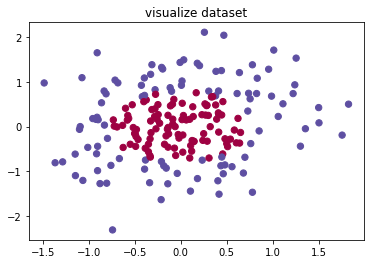

In [35]:
# Load Datasets
noisy_circles, noisy_moons,blobs,gaussian_quantiles,no_structure = planar_utils.load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles
            }

dataset_names = "gaussian_quantiles"

X,Y = datasets[dataset_names]
print(f"X.shape: {X.shape}")
print(f"Y.shape: {Y.shape}")
# Y =Y.reshape(Y.shape[0],1)
# print(f"Y.shape: {Y.shape}")
# make blobs multi labels become binary 
Y = Y %2 # 0,1 value

# Visualize the data
plt.scatter(X[:,0],X[:,1],c = Y,s = 40,cmap = plt.cm.Spectral)
plt.title("visualize dataset")
Y[Y==0]= -1 # set label 0 is -1

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
# Train - test split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
print(f'X_train.shape: {X_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'Y_train.shape: {Y_train.shape}')
print(f'Y_test.shape: {Y_test.shape}')

X_train.shape: (160, 2)
X_test.shape: (40, 2)
Y_train.shape: (160,)
Y_test.shape: (40,)


### Linear kernel SVM

Accuracy of linear SVM: 45.00  % (percentage if correctly labelled datapoints)


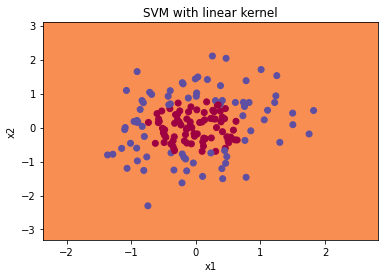

In [38]:
# Train the model
model = LinearSVM()
model.fit(X,Y.reshape((-1,1)))
# Plot the decision boundary for logistic regression
planar_utils.plot_decision_boundary(lambda x: model.predict(x), X_train.T, Y_train.T)
plt.title("SVM with linear kernel")
# Evaluate the model
LR_predictions = model.predict(X_test)
print('Accuracy of linear SVM: %.2f ' % float(np.sum(Y_test == LR_predictions)/len(Y_test)*100) + ' % ' +
      '(percentage if correctly labelled datapoints)'
     )

200 support vectors out of 200 points
Accuracy of linear SVM: 40.00  % (percentage if correctly labelled datapoints)


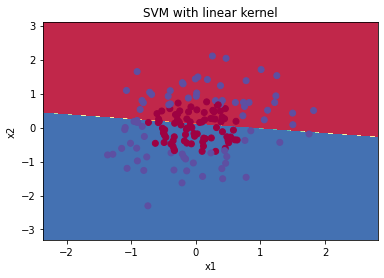

In [39]:
# Train the model
model = MySVM(kernel="linear", C=None, gamma = 0.05)
model.fit(X,Y)
# Plot the decision boundary for logistic regression
planar_utils.plot_decision_boundary(lambda x: model.predict(x), X_train.T, Y_train.T)
plt.title("SVM with linear kernel")
# Evaluate the model
LR_predictions = model.predict(X_test)
print('Accuracy of linear SVM: %.2f ' % float(np.sum(Y_test == LR_predictions)/len(Y_test)*100) + ' % ' +
      '(percentage if correctly labelled datapoints)'
     )

### RBF kernel

7 support vectors out of 200 points
Accuracy of RBF_kernel SVM: 100.00  % (percentage if correctly labelled datapoints)


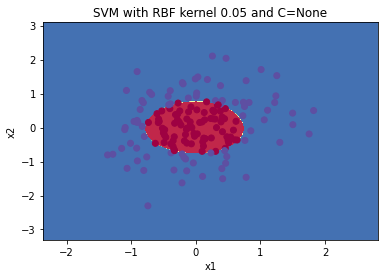

In [40]:
# Train the model
model = MySVM(kernel="rbf", C=None, gamma = 0.05)
model.fit(X,Y)
# Plot the decision boundary for logistic regression
planar_utils.plot_decision_boundary(lambda x: model.predict(x), X_train.T, Y_train.T)
plt.title("SVM with RBF kernel %.2f and C=None" %(model.gamma))
# Evaluate the model
LR_predictions = model.predict(X_test)
print('Accuracy of RBF_kernel SVM: %.2f ' % float(np.sum(Y_test == LR_predictions)/len(Y_test)*100) + ' % ' +
      '(percentage if correctly labelled datapoints)'
     )

## Linearly seperable data with small overlap

Text(0.5, 1.0, 'gen_lin_separable_data')

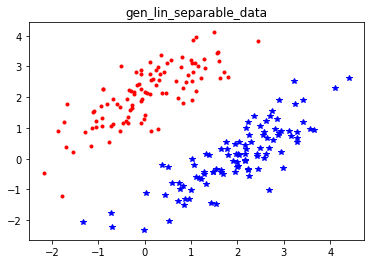

In [41]:
import pylab as pl

def gen_lin_separable_data():
    # generate training data in the 2-d case
    mean1 = np.array([0,2])
    mean2 = np.array([2,0])
    cov = np.array([[0.8,0.6],
                    [0.6,0.8]])
    X1 = np.random.multivariate_normal(mean1,cov,100)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2,cov,100)
    y2 = np.ones(len(X2)) * -1
    return X1,y1,X2,y2

X1,y1,X2,y2 = gen_lin_separable_data()

plt.plot(X1[:,0],X1[:,1],'r.',X2[:,0],X2[:,1],'b*')
plt.title('gen_lin_separable_data')

Text(0.5, 1.0, 'gen_non_lin_separable_data')

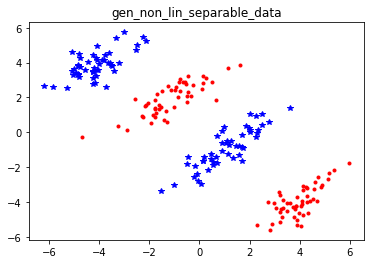

In [42]:
def gen_non_lin_separable_data():
    mean1 = np.array([-1,2])
    mean2 = np.array([1,-1])
    mean3 = np.array([4,-4])
    mean4 = np.array([-4,4])
    cov = np.array([[1.0,0.8],
                    [0.8,1.0]])
    X1 = np.random.multivariate_normal(mean1,cov,50)
    X2 = np.random.multivariate_normal(mean2,cov,50)
    X3 = np.random.multivariate_normal(mean3,cov,50)
    X4 = np.random.multivariate_normal(mean4,cov,50)
    X1 = np.vstack((X1,X3))
    X2 = np.vstack((X2,X4))
    y1 = np.ones(len(X1)) # positive labels
    y2 = np.ones(len(X2)) * 1 # negative labels
    return X1,y1,X2,y2

X1,y1,X2,y2 = gen_non_lin_separable_data()

plt.plot(X1[:,0],X1[:,1],'r.',X2[:,0],X2[:,1],'b*')
plt.title('gen_non_lin_separable_data')

Text(0.5, 1.0, 'gen_lin_separable_overlap_data')

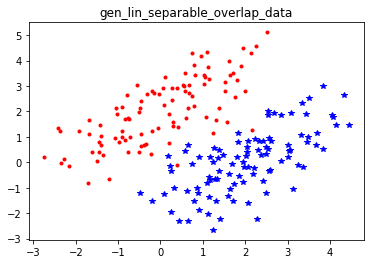

In [43]:
def gen_lin_separable_overlap_data():
    # generate training data in the 2-d case
    mean1 = np.array([0,2])
    mean2 = np.array([2,0])
    cov = np.array([[1.5,1.0],[1.0,1.5]])
    X1 = np.random.multivariate_normal(mean1,cov,100)
    y1 = np.ones(len(X1))
    X2 = np.random.multivariate_normal(mean2,cov,100)
    y2 = np.ones(len(X2)) * -1
    return X1,y1,X2,y2

X1,y1,X2,y2  = gen_lin_separable_overlap_data()
plt.plot(X1[:,0],X1[:,1],'r.',X2[:,0],X2[:,1],'b*')
plt.title("gen_lin_separable_overlap_data")

In [44]:
import random
def split_train_test(X1,y1,X2,y2,test_size = 0.2):
    X = np.vstack((X1,X2))
    y = np.hstack((y1,y2)).reshape(-1,1)
    m = len(X) # number of all sample
    n = int(test_size * len(X))
    Xy = np.hstack((X,y))
    # print(Xy.shape)
    full = np.arange(m)
    train = np.random.choice(full,size = m - n)
    test = np.setdiff1d(full,train)
    # print(test)
    # train
    Xy_train = np.delete(Xy,test,axis = 0)
    X_train,y_train = Xy_train[:,:2],Xy_train[:,-1]
    # test
    Xy_test = np.delete(Xy,train,axis = 0)
    X_test,y_test = Xy_test[:,:2],Xy_test[:,-1]
    return (X_train,y_train),(X_test,y_test)

X_train: (116, 2)
y_train: (116,)
X_test: (84, 2)
y_test: (84,)


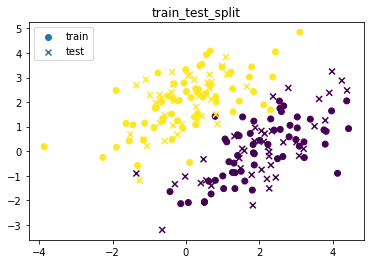

In [45]:
X1,y1,X2,y2  = gen_lin_separable_overlap_data()
(X_train,y_train),(X_test,y_test)= split_train_test(X1,y1,X2,y2)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")
plt.scatter(X_train[:,0],X_train[:,1],c = y_train,label = "train",marker ='o')
plt.scatter(X_test[:,0],X_test[:,1],c = y_test,label = "test",marker = 'x')
plt.title("train_test_split")
plt.legend()

In [46]:
def plot_margin(X1_train,X2_train,model):
    def f(x,w,b,c=0):
        # given x, return y such that [x,y] in on the line
        # w.x +b = c
        return (-w[0] * x - b + c)/ w[1]
    
    pl.plot(X1_train[:,0],X1_train[:,1],'ro')
    pl.plot(X2_train[:,0],X2_train[:,1],'bo')
    pl.scatter(model.sv[:,0],model.sv[:,1],s = 100, c= 'g')
    
    # w.x + b = 0
    a0 = -4
    a1 = f(a0,model.w,model.b)
    b0 = 4
    b1 = f(b0,model.w,model.b)
    pl.plot([a0,b0],[a1,b1],'k')
    
    # w.x + b = 1
    a0 = -4
    a1 = f(a0,model.w,model.b,1)
    b0 = 4
    b1 = f(b0,model.w,model.b,1)
    pl.plot([a0,b0],[a1,b1],'k--')
    
    # w.x + b = -1
    a0 = -4
    a1 = f(a0,model.w,model.b,-1)
    b0 = 4
    b1 = f(b0,model.w,model.b,-1)
    pl.plot([a0,b0],[a1,b1],'k--')
    
    plt.axis('tight')
    plt.show()

def plot_svm_contour(X1_train,X2_train,model):
    X1,X2 = np.meshgrid(np.linspace(-6,6,50),np.linspace(-6,6,50))
    X = np.array([[x1,x2] for x1,x2 in zip(np.ravel(X1),np.ravel(X2))])
    Z = model.project(X).reshape(X1.shape)
    pl.contour(X1,X2,Z,[0.0],cmap = plt.cm.Spectral)
    pl.contour(X1,X2,Z + 1,[0.0],colors ='grey',linewidths = 1, origin = 'lower')
    pl.contour(X1,X2,Z - 1,[0.0],colors ='grey',linewidths = 1, origin = 'lower')
    pl.scatter(X1_train[:,0],X1_train[:,1],c = 'r',s = 10,cmap = plt.cm.Spectral)
    pl.scatter(X1_train[:,0],X1_train[:,1],c = 'b',s =10,cmap = plt.cm.Spectral)
    if model.C == None:
        plt.scatter(model.sv[:,0],model.sv[:,1],s= 40,c ='g')
    else:
        plt.scatter(model.real_sv[:,0],model.real_sv[:,1],s = 40, c= 'g')
    pl.axis('tight')
    # pl.show()
    
def plot_svm_boundary(model,X,y):
    # Set min and max values and give it something
    x_min,x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min,y_max = X[:,1].min() - 1, X[:,1].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    # Predict the function value for the whole grid
    Z  = model.project(np.c_[xx.ravel(),yy.ravel()])
    Z  = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx,yy,np.sign(Z),cmap = plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    
    plt.scatter(X[:,0],X[:,1],c = y.reshape((-1,)),s= 10,cmap = plt.cm.Spectral)
    plt.scatter(model.sv[:,0],model.sv[:,1],s = 40, c ='g')

X_train: (108, 2)
y_train: (108,)
X_test: (92, 2)
y_test: (92,)


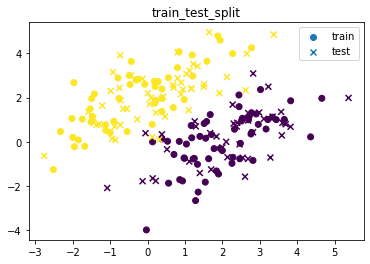

In [53]:
X1, y1, X2, y2 = gen_lin_separable_overlap_data()
(X_train,y_train),(X_test,y_test)= split_train_test(X1,y1,X2,y2)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")
plt.scatter(X_train[:,0],X_train[:,1],c = y_train,label = "train",marker ='o')
plt.scatter(X_test[:,0],X_test[:,1],c = y_test,label = "test",marker = 'x')
plt.title("train_test_split")
plt.legend()

### Linear kernel SVM without soft margin

3 support vectors out of 108 points
87 out of 92 predictions correct


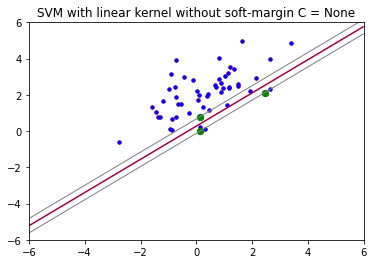

In [54]:
model = MySVM(C = None)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
correct = np.sum(y_pred== y_test)
print("%d out of %d predictions correct" %(correct,len(y_test)))
plt.title("SVM with linear kernel without soft-margin C = None")
plot_svm_contour(X_test[y_test==1],X_test[y_test == -1],model)
#plot_svm_boundary(model,X_test,y_test)

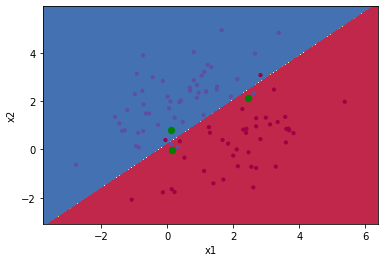

In [55]:
plot_svm_boundary(model,X_test,y_test)

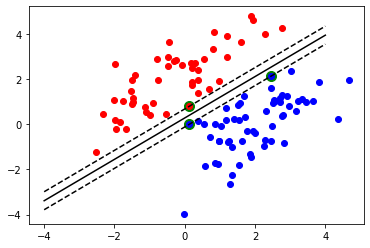

In [56]:
plot_margin(X_train[y_train ==1],X_train[y_train ==-1],model)

### Linear kernel SVM with soft margin

3 support vectors out of 108 points
87 out of 92 predictions correct


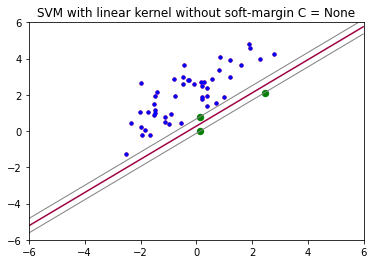

In [57]:
model = MySVM(C = 1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
correct = np.sum(y_pred== y_test)
print("%d out of %d predictions correct" %(correct,len(y_test)))
plt.title("SVM with linear kernel without soft-margin C = None")
plot_svm_contour(X_train[y_train==1],X_test[y_test == -1],model)
#plot_svm_boundary(model,X_test,y_test)

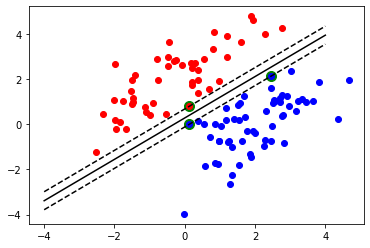

In [58]:
plot_margin(X_train[y_train ==1],X_train[y_train ==-1],model)

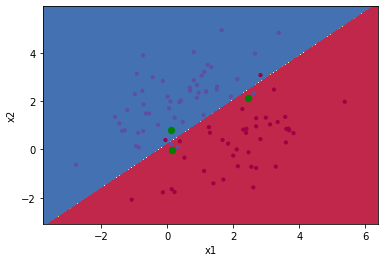

In [59]:
plot_svm_boundary(model,X_test,y_test)